In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *

In [3]:
init_printing()

In [4]:
a, b = symbols('a b')

In [5]:
ab = Matrix([a, b])

In [6]:
ab

In [7]:
x = Matrix([symbols('x1:{}'.format(4))]).T

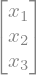

In [8]:
x

In [9]:
X = ones(3,1).row_join(x)

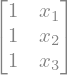

In [10]:
X

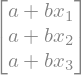

In [11]:
X*ab

In [12]:
y = Matrix([symbols('y1:{}'.format(4))]).T

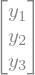

In [13]:
y

In [14]:
r = Matrix([symbols('r1:{}'.format(4))]).T

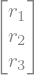

In [15]:
r

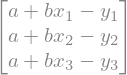

In [16]:
X*ab-y

In [17]:
(X*ab-y).T

In [18]:
(X*ab-y).T*(X*ab-y)

In [19]:
expand((X*ab-y).T*(X*ab-y))

In [21]:
y.T*y - y.T*X*ab - ab.T*X.T*y + ab.T*X.T*X*ab

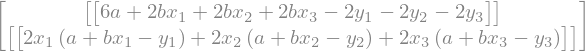

In [20]:
diff((X*ab-y).T*(X*ab-y), ab)    #gradient

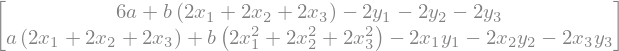

In [23]:
-2*X.T*y + 2*X.T*X*ab    #the gradient can be arranged like this
# X.T*X*ab = X.T*y
# ab = (X.T*X).inv()*X.T*y

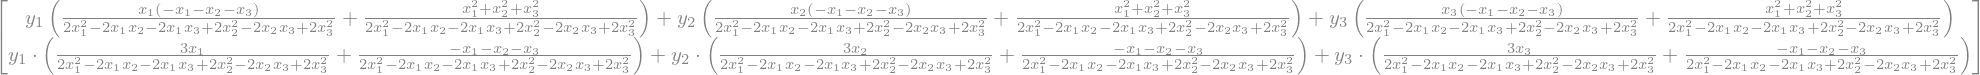

In [24]:
(X.T*X).inv()*X.T*y     #The solution

## Other ways to obtain the solution















#

In [19]:
diff((X*ab-y).T*(X*ab-y), a)

In [20]:
diff((X*ab-y).T*(X*ab-y), b)

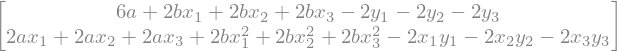

In [21]:
Matrix([diff((X*ab-y).T*(X*ab-y), a),expand(diff((X*ab-y).T*(X*ab-y), b))])

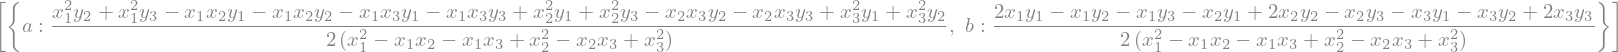

In [22]:
solve(Matrix([diff((X*ab-y).T*(X*ab-y), a),expand(diff((X*ab-y).T*(X*ab-y), b))]))

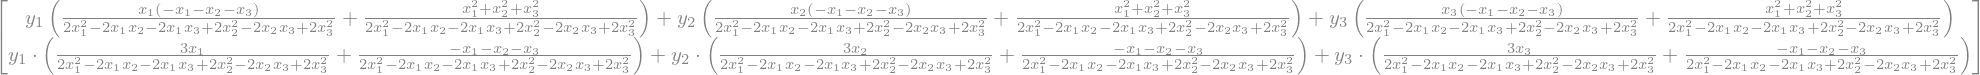

In [23]:
(X.T*X).inv()*X.T*y

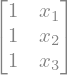

In [26]:
X

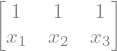

In [27]:
X.T

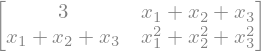

In [28]:
X.T*X

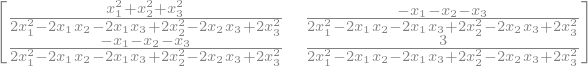

In [30]:
(X.T*X).inv()